1.Kmeans聚类

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# 读取数据
data = pd.read_csv("data.csv")
X = data.iloc[:,1:]
print(X)

    assists_per_minute  points_per_minute
0               0.0888             0.5885
1               0.1399             0.8291
2               0.0747             0.4974
3               0.0983             0.5772
4               0.1276             0.5703
5               0.1671             0.5835
6               0.1906             0.5276
7               0.1061             0.5523
8               0.2446             0.4007
9               0.1670             0.4770
10              0.2485             0.4313
11              0.1227             0.4909
12              0.1240             0.5668
13              0.1461             0.5113
14              0.2315             0.3788
15              0.0494             0.5590
16              0.1107             0.4799
17              0.2521             0.5735
18              0.1007             0.6318
19              0.1067             0.4326
20              0.1956             0.4280


In [3]:
#K-means聚类
clf = KMeans(n_clusters=5)  #表示输出将数据集分成类簇数为5的聚类
#输出聚类预测结果，对X聚类，20行数据，每个y_pred对应X的一行或一个孩子，聚成3类，类标为0、1、2
y_pred = clf.fit_predict(X)
print(y_pred)  #输出结果

x = X.iloc[:,0]
y = X.iloc[:,1]

g:\BDC\conda\lab\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 0 3 1 1 4 4 1 2 3 2 3 1 3 2 1 3 4 1 3 2]


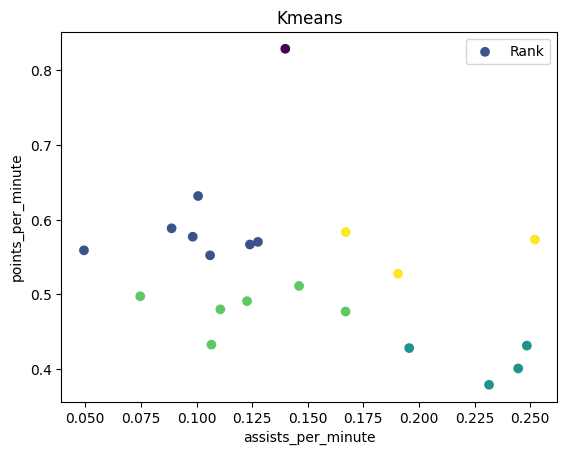

In [4]:
# 可视化操作
#绘制散点图（scatter），横轴为x，获取的第1列数据；纵轴为y，获取的第2列数据；
#c=y_pred对聚类的预测结果画出散点图，marker='o'说明用点表示图形
plt.scatter(x, y, c=y_pred, marker='o')
plt.title("Kmeans")
plt.xlabel("assists_per_minute")  #表示图形x轴的标题
plt.ylabel("points_per_minute")  #表示图形y轴的标题
plt.legend(["Rank"])  #设置右上角图例
plt.show()  #显示图形

2.DBSCAN聚类

In [19]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
import numpy as np
from sklearn.datasets._samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [30]:
centers =[[ 0.93392233,  0.34254677],
       [ 1.38063091, -1.20734734],
       [-0.85180007,  0.40766444],
       [-0.12294513,  3.07383108],
       [-0.27738899, -0.50667951]]
X, labels_true = make_blobs(n_samples=21, centers=centers, cluster_std=0.4, random_state=0)
X = StandardScaler().fit_transform(X)

array([[-1.10579248, -0.25320286],
       [-0.80875254, -0.60944953],
       [ 1.08330388, -1.04919253],
       [ 0.86028982,  0.56581251],
       [ 1.16126444,  0.05166144],
       [ 0.96839689, -0.73618878],
       [ 1.20093336, -0.33308125],
       [-0.50989886,  1.79484996],
       [-1.07727571, -1.04975751],
       [ 1.48580296, -1.19969828],
       [-0.82385836, -0.73755931],
       [ 0.0600073 ,  2.25755247],
       [-0.35588501, -0.42086918],
       [ 0.84930977, -0.10238657],
       [-0.86768314,  1.29386131],
       [-0.46805181,  1.95276149],
       [-0.20390049, -0.31727407],
       [ 1.20486217, -1.1084078 ],
       [ 0.44562588,  0.05457789],
       [-0.89447848, -0.22193857],
       [-2.20421958,  0.1679292 ]])

[ 0  1  2 -1 -1 -1 -1  3 -1  2  1 -1  4 -1 -1  3  4  2 -1  0 -1]
Estimated number of clusters: 5
Homogeneity: 0.556
Completeness: 0.584
V-measure: 0.569
Adjusted Rand Index: 0.248
Adjusted Mutual Information: 0.332
Silhouette Coefficient: 0.168


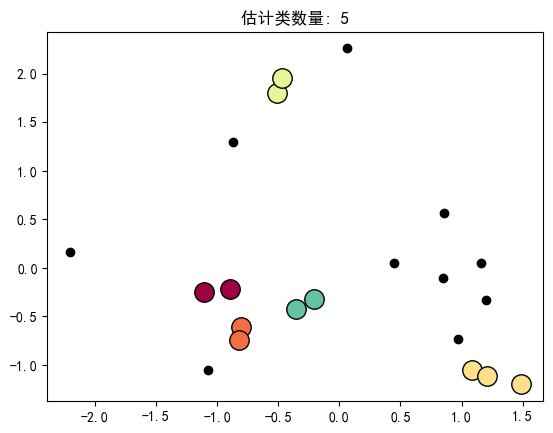

In [31]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)# 设置一个样本个数长度的全false向量
core_samples_mask[db.core_sample_indices_] = True #将核心样本部分设置为true
labels = db.labels_
print(labels)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels)) # 每个簇只包含单个类的成员
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))# 给定类的所有成员都分配给同一个簇。
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))# 给定类的所有成员都分配给同一个群集。
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# 使用黑色标注离散点
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # 使用黑色标注离散点
        # 使用黑色绘制离散点
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)# 将所有属于该聚类的样本位置置为true

    xy = X[class_member_mask & core_samples_mask] # 将所有属于该类的核心样本取出，使用大图标绘制
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]# 将所有属于该类的非核心样本取出，使用小图标绘制
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('估计类数量: %d' % n_clusters_)
plt.show()